In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('esg_data.csv', parse_dates=['Date'])

# Fill missing values with mean for numeric columns
numeric_columns = ['Environmental_Score', 'Social_Score', 'Governance_Score', 'Overall_Score']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[numeric_columns])

# Split data into training and testing sets
training_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - training_size
train_data, test_data = scaled_data[0:training_size, :], scaled_data[training_size:len(scaled_data), :]

# Function to create datasets
def create_dataset(data, time_step=1):
    dataX, dataY = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), :]
        dataX.append(a)
        dataY.append(data[i + time_step, -1])  # Predicting Overall_Score
    return np.array(dataX), np.array(dataY)

time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Print shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (853, 10, 4)
y_train shape: (853,)
X_test shape: (205, 10, 4)
y_test shape: (205,)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('esg_data.csv', parse_dates=['Date'])

# Display basic information about the dataset
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 1080 non-null   datetime64[ns]
 1   Asset                1080 non-null   object        
 2   Environmental_Score  1080 non-null   float64       
 3   Social_Score         1080 non-null   float64       
 4   Governance_Score     1080 non-null   float64       
 5   Overall_Score        1080 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 50.8+ KB
None
                      Date  Environmental_Score  Social_Score  \
count                 1080          1080.000000   1080.000000   
mean   2019-07-16 05:33:20            74.616367     75.347405   
min    2015-01-31 00:00:00            50.126350     50.003437   
25%    2017-04-22 12:00:00            61.754252     62.711801   
50%    2019-07-15 12:00:00          

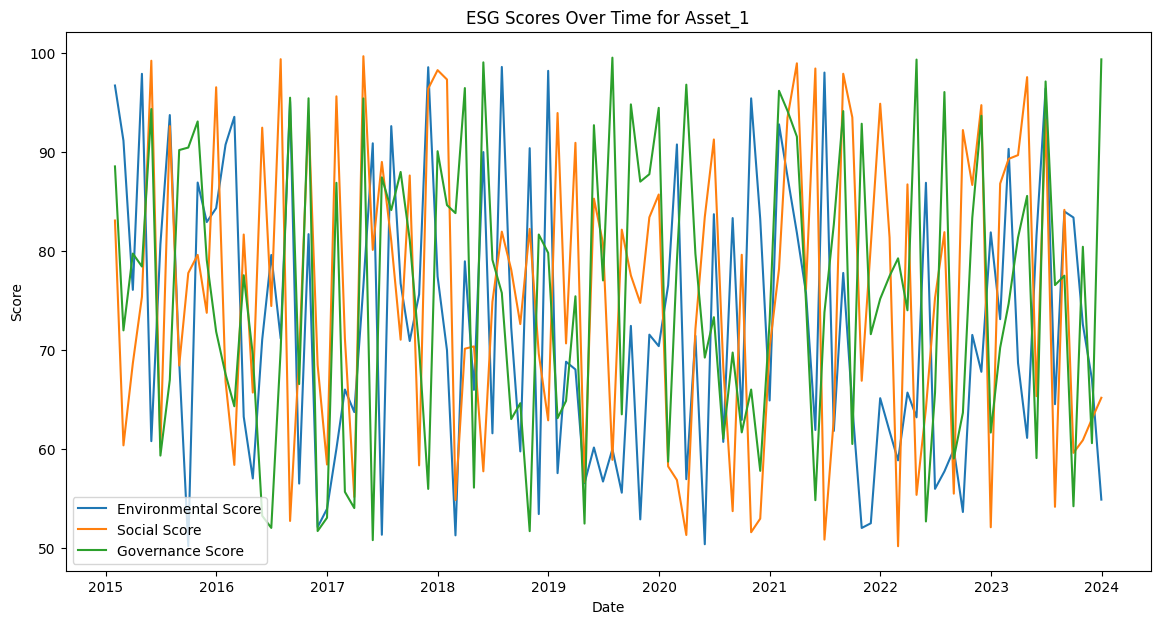

In [4]:
# Plotting the ESG scores over time for an example asset
example_asset = df['Asset'].unique()[0]
df_asset = df[df['Asset'] == example_asset]

plt.figure(figsize=(14, 7))
plt.plot(df_asset['Date'], df_asset['Environmental_Score'], label='Environmental Score')
plt.plot(df_asset['Date'], df_asset['Social_Score'], label='Social Score')
plt.plot(df_asset['Date'], df_asset['Governance_Score'], label='Governance Score')
plt.title(f'ESG Scores Over Time for {example_asset}')
plt.xlabel('Date')
plt.ylabel('Score')
plt.legend()
plt.show()

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, batch_size=1, epochs=10)

# Predictions
train_predict_lstm = lstm_model.predict(X_train)
test_predict_lstm = lstm_model.predict(X_test)

# Inverse transform to get actual values
train_predict_lstm = scaler.inverse_transform(np.concatenate((np.zeros((train_predict_lstm.shape[0], X_train.shape[2]-1)), train_predict_lstm), axis=1))[:, -1]
test_predict_lstm = scaler.inverse_transform(np.concatenate((np.zeros((test_predict_lstm.shape[0], X_test.shape[2]-1)), test_predict_lstm), axis=1))[:, -1]


Epoch 1/10
853/853 [==============================] - 12s 9ms/step - loss: 0.0422
Epoch 2/10
853/853 [==============================] - 7s 8ms/step - loss: 0.0393
Epoch 3/10
853/853 [==============================] - 8s 9ms/step - loss: 0.0381
Epoch 4/10
853/853 [==============================] - 7s 8ms/step - loss: 0.0384
Epoch 5/10
853/853 [==============================] - 8s 9ms/step - loss: 0.0374
Epoch 6/10
853/853 [==============================] - 7s 9ms/step - loss: 0.0379
Epoch 7/10
853/853 [==============================] - 8s 9ms/step - loss: 0.0379
Epoch 8/10
853/853 [==============================] - 7s 9ms/step - loss: 0.0378
Epoch 9/10
853/853 [==============================] - 7s 9ms/step - loss: 0.0370
Epoch 10/10
7/7 [==============================] - 0s 5ms/step


In [9]:
from tensorflow.keras.layers import GRU

# GRU Model
gru_model = Sequential()
gru_model.add(GRU(50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
gru_model.add(GRU(50, return_sequences=False))
gru_model.add(Dense(25))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_model.fit(X_train, y_train, batch_size=1, epochs=10)

# Predictions
train_predict_gru = gru_model.predict(X_train)
test_predict_gru = gru_model.predict(X_test)

# Inverse transform to get actual values
train_predict_gru = scaler.inverse_transform(np.concatenate((np.zeros((train_predict_gru.shape[0], X_train.shape[2]-1)), train_predict_gru), axis=1))[:, -1]
test_predict_gru = scaler.inverse_transform(np.concatenate((np.zeros((test_predict_gru.shape[0], X_test.shape[2]-1)), test_predict_gru), axis=1))[:, -1]


Epoch 1/10
853/853 [==============================] - 12s 8ms/step - loss: 0.0443
Epoch 2/10
853/853 [==============================] - 8s 10ms/step - loss: 0.0397
Epoch 3/10
853/853 [==============================] - 7s 8ms/step - loss: 0.0387
Epoch 4/10
853/853 [==============================] - 8s 9ms/step - loss: 0.0388
Epoch 5/10
853/853 [==============================] - 7s 8ms/step - loss: 0.0380
Epoch 6/10
853/853 [==============================] - 9s 10ms/step - loss: 0.0385
Epoch 7/10
853/853 [==============================] - 7s 8ms/step - loss: 0.0382
Epoch 8/10
853/853 [==============================] - 8s 9ms/step - loss: 0.0381
Epoch 9/10
853/853 [==============================] - 7s 9ms/step - loss: 0.0378
Epoch 10/10
7/7 [==============================] - 0s 4ms/step


In [10]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# CNN Model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_step, X_train.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1))
cnn_model.compile(optimizer='adam', loss='mean_squared_error')
cnn_model.fit(X_train, y_train, batch_size=1, epochs=10)

# Predictions
train_predict_cnn = cnn_model.predict(X_train)
test_predict_cnn = cnn_model.predict(X_test)

# Inverse transform to get actual values
train_predict_cnn = scaler.inverse_transform(np.concatenate((np.zeros((train_predict_cnn.shape[0], X_train.shape[2]-1)), train_predict_cnn), axis=1))[:, -1]
test_predict_cnn = scaler.inverse_transform(np.concatenate((np.zeros((test_predict_cnn.shape[0], X_test.shape[2]-1)), test_predict_cnn), axis=1))[:, -1]


Epoch 1/10
853/853 [==============================] - 3s 2ms/step - loss: 0.0461
Epoch 2/10
853/853 [==============================] - 2s 2ms/step - loss: 0.0406
Epoch 3/10
853/853 [==============================] - 2s 2ms/step - loss: 0.0386
Epoch 4/10
853/853 [==============================] - 2s 2ms/step - loss: 0.0379
Epoch 5/10
853/853 [==============================] - 3s 3ms/step - loss: 0.0369
Epoch 6/10
853/853 [==============================] - 2s 3ms/step - loss: 0.0367
Epoch 7/10
853/853 [==============================] - 2s 2ms/step - loss: 0.0366
Epoch 8/10
853/853 [==============================] - 2s 2ms/step - loss: 0.0359
Epoch 9/10
853/853 [==============================] - 2s 2ms/step - loss: 0.0357
Epoch 10/10
7/7 [==============================] - 0s 2ms/step


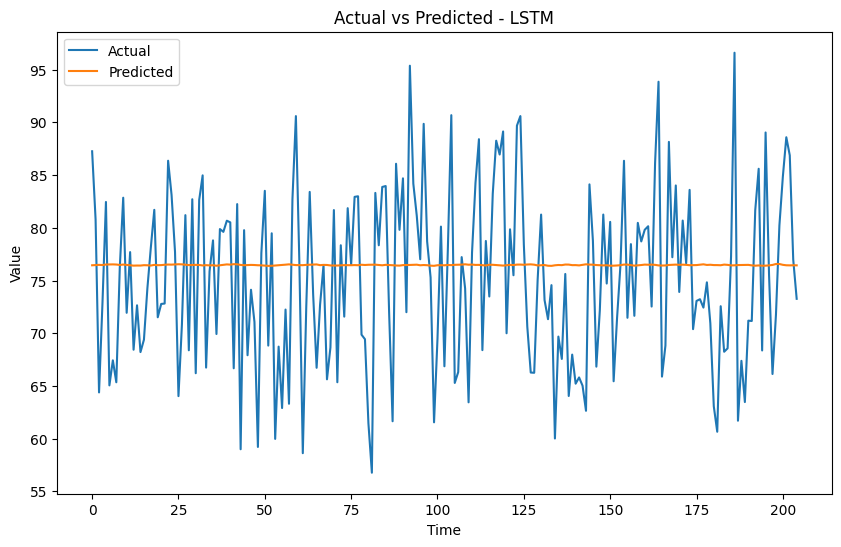

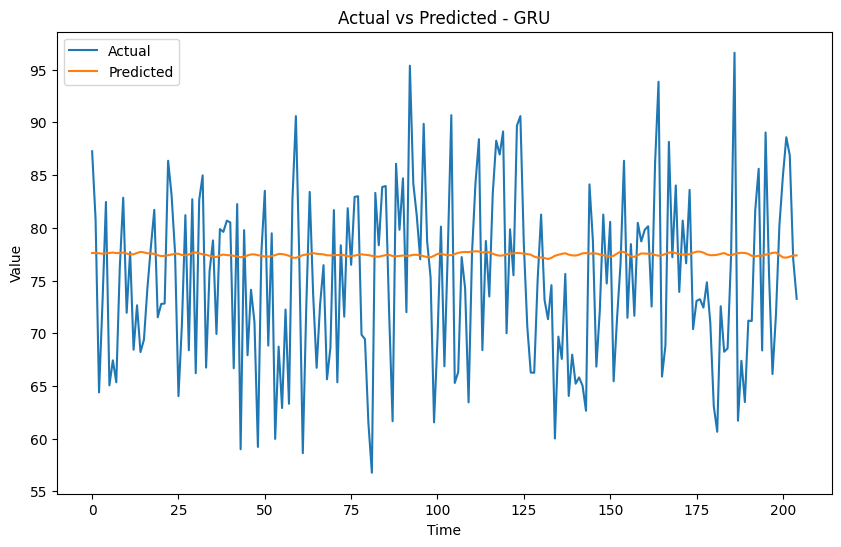

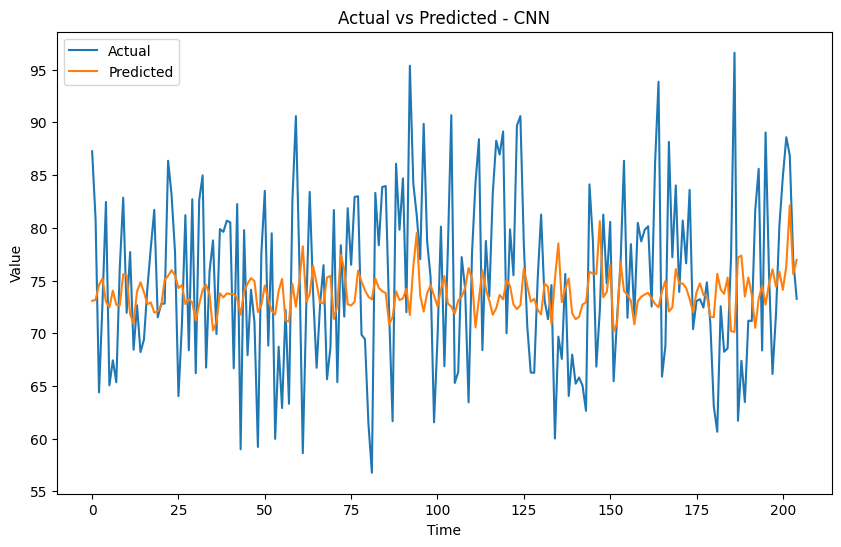

In [11]:
# Function to plot predictions
def plot_predictions(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Evaluate and plot LSTM predictions
plot_predictions(scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], X_test.shape[2]-1)), y_test.reshape(-1, 1)), axis=1))[:, -1], test_predict_lstm, "LSTM")

# Evaluate and plot GRU predictions
plot_predictions(scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], X_test.shape[2]-1)), y_test.reshape(-1, 1)), axis=1))[:, -1], test_predict_gru, "GRU")

# Evaluate and plot CNN predictions
plot_predictions(scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], X_test.shape[2]-1)), y_test.reshape(-1, 1)), axis=1))[:, -1], test_predict_cnn, "CNN")
